## 0. Initialize Packages

In [51]:
#!pip3 install transformers


In [17]:
import seaborn as sns
from scipy.stats import kstest

In [1]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertModel
import logging
import matplotlib.pyplot as plt
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
from sentence_transformers import SentenceTransformer, util
from scipy.stats import ttest_ind

model = SentenceTransformer('all-MiniLM-L6-v2')
#model = BertModel.from_pretrained('bert-large-uncased')

## 1. Get Data

In [3]:
df = pd.read_excel('Embedding_Human_Retellings.xlsx')
df = df.drop(columns =['Unnamed: 0'])
df.columns = ['Story', 'Retell_1','Retell_2', 'Retell_3']

## 1.2. Clean Space in text

In [4]:
df.Story = [s.strip() for s in df.Story]
df.Retell_1 = [s.strip() for s in df.Retell_1]
df.Retell_2 = [s.strip() for s in df.Retell_2]
df.Retell_3 = [s.strip() for s in df.Retell_3]

## 2.1. Get Embeddings

In [5]:
Retell_1_emb = []
for text in df.Retell_1:
    embeddings = model.encode(text)
    Retell_1_emb.append(embeddings)
    
df['Retell_1_emb'] = Retell_1_emb


In [67]:
Retell_2_emb = []
for text in df.Retell_2:
    embeddings = model.encode(text)
    Retell_2_emb.append(embeddings)
    
df['Retell_2_emb'] = Retell_2_emb


In [7]:
Retell_3_emb = []
for text in df.Retell_3:
    embeddings = model.encode(text)
    Retell_3_emb.append(embeddings)
    
df['Retell_3_emb'] = Retell_3_emb


In [8]:
Story_emb = []
for text in df.Story:
    embeddings = model.encode(text)
    Story_emb.append(embeddings)

## 1.3. Get Cosine Similarity between Each Retelling

In [9]:
cosine_scores_real_rt1 = util.cos_sim(Story_emb,Retell_1_emb)
cosine_scores_rt1_rt2 = util.cos_sim(Retell_1_emb,Retell_2_emb)
cosine_scores_rt2_rt3 = util.cos_sim(Retell_2_emb,Retell_3_emb)
cosine_scores_real_rt2 = util.cos_sim(Story_emb,Retell_2_emb)
cosine_scores_real_rt3 = util.cos_sim(Story_emb,Retell_3_emb)
cosine_scores_rt1_rt3 = util.cos_sim(Retell_1_emb,Retell_3_emb)

/Users/eotenen/Library/Python/3.10/lib/python/site-packages/sentence_transformers/util.py:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:204.)
  a = torch.tensor(a)


In [10]:
cosine_scores_rt1_rt2.shape

torch.Size([116, 116])

## 1.3.1. Averaged Embeddings

In [66]:
cosine_scores_real_rt1.shape

torch.Size([116, 116])

In [18]:
real_rt1_mean = torch.mean(cosine_scores_real_rt1,dim=1)    
rt1_rt2_mean = torch.mean(cosine_scores_rt1_rt2,dim=1)    
rt2_rt3_mean = torch.mean(cosine_scores_rt2_rt3,dim=1)    
real_rt3_mean = torch.mean(cosine_scores_real_rt3,dim=1)
real_rt2_mean = torch.mean(cosine_scores_real_rt2,dim=1)
rt1_rt3_mean = torch.mean(cosine_scores_rt1_rt3,dim=1)    

In [23]:
real_rt1_mean_dimzero = torch.mean(cosine_scores_real_rt1,dim=0)    
rt1_rt2_mean_dimzero = torch.mean(cosine_scores_rt1_rt2,dim=0)    
rt2_rt3_mean_dimzero = torch.mean(cosine_scores_rt2_rt3,dim=0)    
real_rt3_mean_dimzero = torch.mean(cosine_scores_real_rt3,dim=0)
real_rt2_mean_dimzero = torch.mean(cosine_scores_real_rt2,dim=0)
rt1_rt3_mean_dimzero = torch.mean(cosine_scores_rt1_rt3,dim=0)    

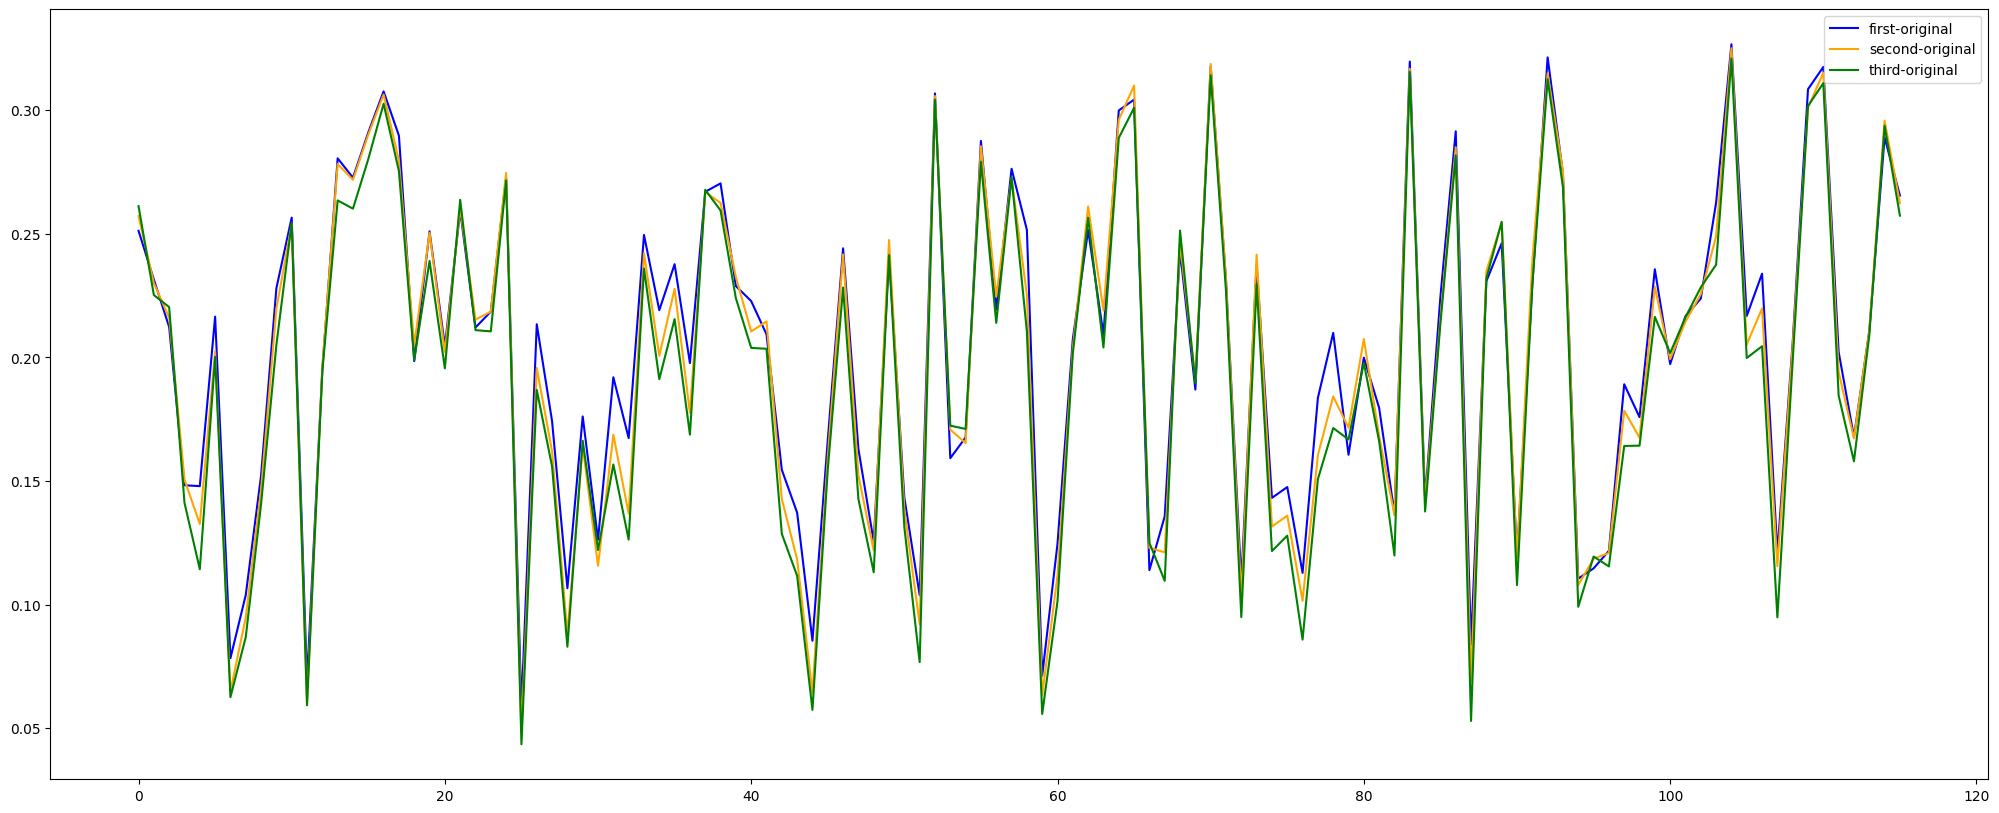

In [46]:
from matplotlib.pyplot import figure


plt.plot(real_rt1_mean.numpy(), label='first-original', color='blue')
plt.plot(real_rt2_mean.numpy(),label='second-original' ,color = 'orange')
plt.plot(real_rt3_mean.numpy(),label='third-original',  color = 'green')


plt.legend()
plt.rcParams["figure.figsize"] = (25,10)


plt.show()


In [48]:
kstest(real_rt1_mean,real_rt3_mean)

KstestResult(statistic=0.10344827586206896, pvalue=0.5660616272614291)

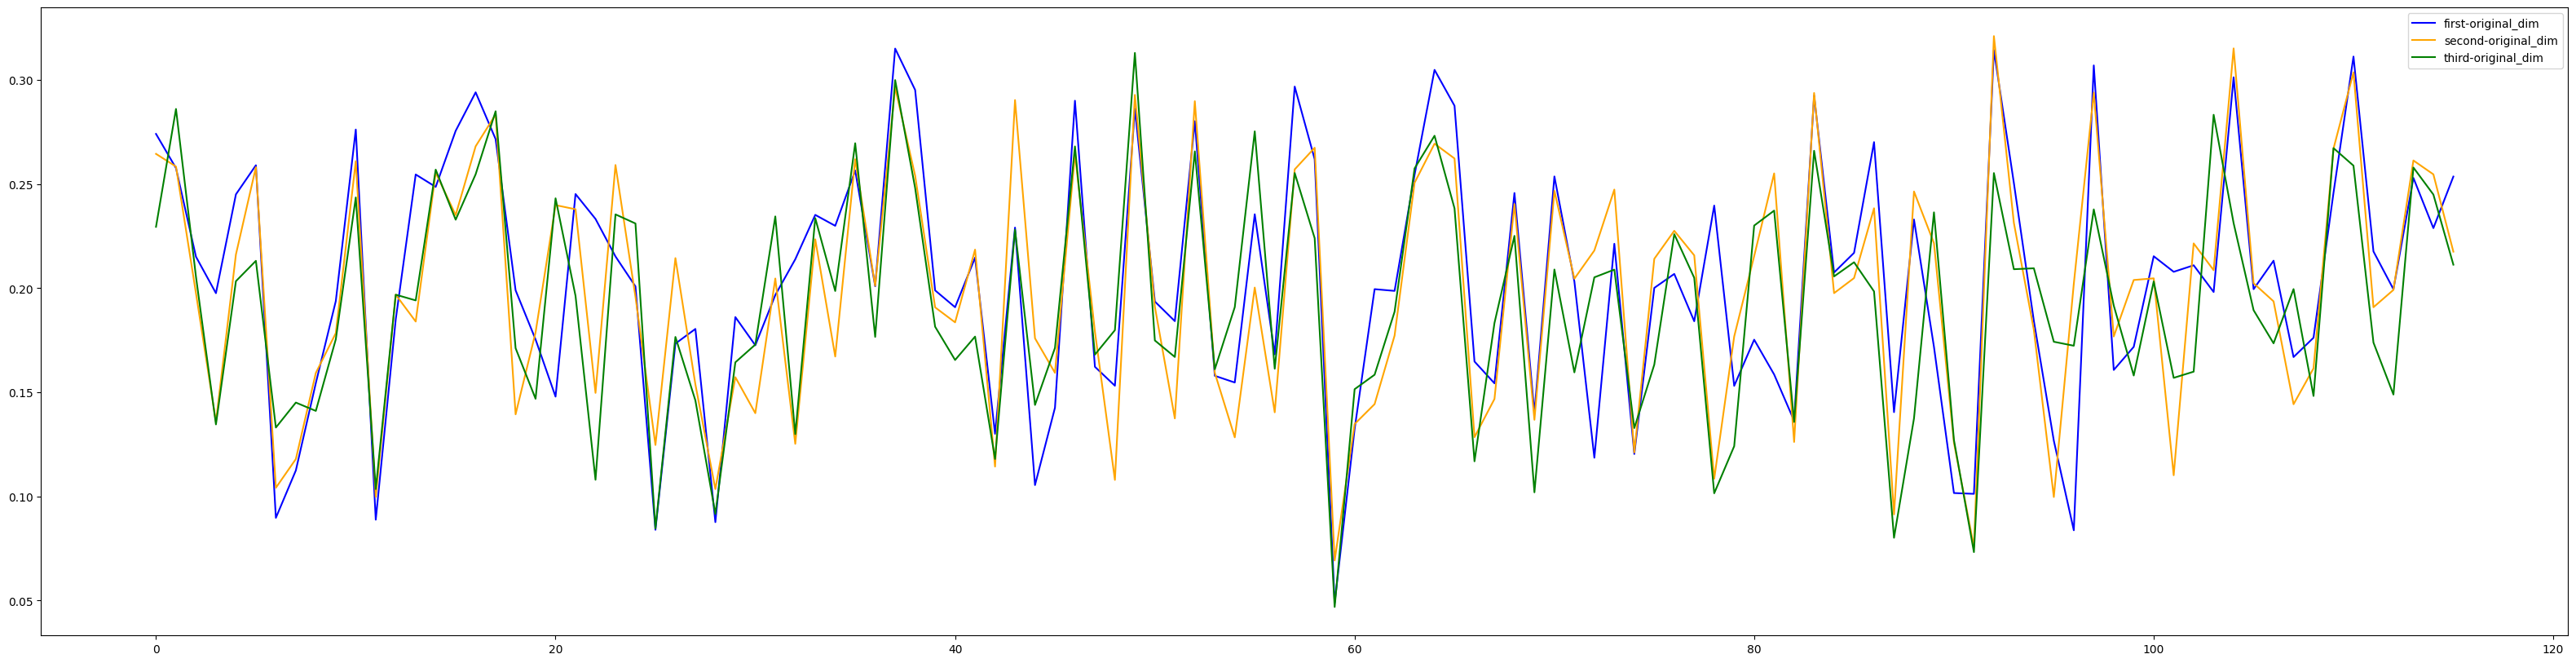

In [32]:

plt.plot(real_rt1_mean_dimzero.numpy(), label='first-original_dim',color='blue')
plt.plot(real_rt2_mean_dimzero.numpy(),label='second-original_dim',color = 'orange')
plt.plot(real_rt3_mean_dimzero.numpy(),label='third-original_dim',color = 'green')


plt.legend()
plt.rcParams["figure.figsize"] = (25,10)


plt.show()

In [ ]:
real_rt1_mean_dimzero = torch.mean(cosine_scores_real_rt1,dim=0)    
rt1_rt2_mean_dimzero = torch.mean(cosine_scores_rt1_rt2,dim=0)    
rt2_rt3_mean_dimzero = torch.mean(cosine_scores_rt2_rt3,dim=0)    
real_rt3_mean_dimzero = torch.mean(cosine_scores_real_rt3,dim=0)
real_rt2_mean_dimzero = torch.mean(cosine_scores_real_rt2,dim=0)
rt1_rt3_mean_dimzero = torch.mean(cosine_scores_rt1_rt3,dim=0)   

In [ ]:
plt.plot(real_rt1_mean_dimzero.numpy(), label='first-original')
plt.plot(real_rt2_mean_dimzero.numpy(),label='second-original')
plt.plot(real_rt3_mean_dimzero.numpy(),label='third-original')
plt.legend()
plt.rcParams["figure.figsize"] = (50,40)


plt.show()